In [26]:
import os

os.environ["SEED"] = "0"
import numpy as np
import pandas as pd
from ConfigSpace import Configuration

from src.aac.AAC import AAC
from src.configuration_space.LKH import CONFIGURATION_SPACE
from src.constant import DATA_DIR, SEED, DATABASE_DIR, MAIN_DIR
from src.database import DB
from src.database.queries import *
from src.instance.Instance import Instance
from src.instance.InstanceList import InstanceList
from src.instance.TSP_Instance import TSP_Instance, TSP_train_test_from_index_file, TSP_from_index_file
from src.solver.Portfolio import Portfolio
from src.solver.TSP_LKH_Solver import TSP_LKH_Solver
from src.aac.SurrogateEstimator import Estimator1, SurrogateEstimator

In [27]:
# cluster_netgen
# compression
# expansion
# explosion
# grid
# cluster
# implosion
# linearprojection
# rotation
# uniform_portgen

In [28]:
instances = TSP_from_index_file(
    filepath=DATA_DIR / "TSP" / "MY" / "index.json"
)

In [29]:
instances[0]._get_short_filepath()

'TSP/MY/cluster_netgen/000.tsp'

In [21]:
for instance in instances:
    time, optimum = instance._get_optimum_with_concorde()

In [25]:
optimum

10.0

In [4]:
N = 245
instances = TSP_from_index_file(
    filepath=DATA_DIR / "TSP" / "CEPS_benchmark" / "index.json"
)

number_of_instances = N // 5
train_instances = InstanceList()
test_instances = InstanceList()
for i in range(10):
    test_instances.append(instances[i * 50])
for i in range(1, 6):
    train_instances.extend(instances[i * 50 + 1 : i * 50 + number_of_instances + 1])

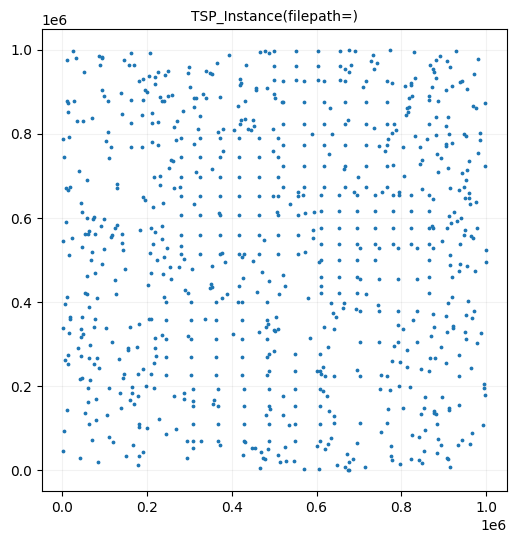

In [36]:
TSP_Instance(MAIN_DIR / "testtsp.tsp", optimum=0).plot()

In [24]:
rows = []

for instance in train_instances:
    s = instance._read_file_to_df().max()
    s["name"] = instance.filepath.parts[-2]
    rows.append(s)

In [27]:
pd.DataFrame(rows).groupby("name").max()

,X,Y
name,,
cluster_netgen,1000000.0,1000000.0
compression,1000000.0,1000000.0
expansion,1000000.0,1000000.0
explosion,1000000.0,1000000.0
grid,1000000.0,1000000.0


In [23]:
s

X             937028.0
Y            1000000.0
name    cluster_netgen
dtype: object

'cluster_netgen'

In [9]:
# for instance in test_instances:
#     instance.plot(fname=instance.filepath.parts[-2] + ".png")

In [6]:
portfolio = Portfolio.from_solver_class(TSP_LKH_Solver, size=2)
portfolio

Portfolio(size=2)[Solver(id=52980316141715150), Solver(id=473831520656465062)]

In [ ]:
aac = AAC(
    portfolio=portfolio,
    instance_list=train_instances,
    prefix="config",
    max_iter=75,
    calculate_features=True,
    estimator=None,
)

last_model_iter = 0

estimator = None
db = DB()
estimator_pct = 0.5
for _ in aac.configure_iter():
    if aac.iter > 25 and aac.iter - last_model_iter >= 5:
        X, y = get_model_training_data(db)
        estimator = Estimator1(
            max_cost=TSP_LKH_Solver.MAX_COST, estimator_pct=estimator_pct
        )
        estimator.fit(X, y)
        estimator.log()
        last_model_iter = aac.iter
        aac.update(estimator=estimator)

In [10]:
# db = DB()
db = DB("database/run-plain-30-925182.db")

In [16]:
instances = pd.read_sql_query("SELECT * FROM instances", db._conn)
instances

,id,filepath,optimum,angle_min,angle_median,angle_mean,angle_max,angle_sd,angle_span,angle_coef_of_var,...,bc_no1s_min,bc_no1s_q25,bc_no1s_q50,bc_no1s_q75,bc_no1s_max,bc_p1s,bc_pn1s,bcTime,acc,acfTime
0,822075595471039179,TSP/CEPS_benchmark/cluster_netgen/01.tsp,9080004.0,0.011018,1.411569,1.481377,3.129632,0.897300,3.118615,0.605720,...,0.055556,0.500000,0.5,0.500000,0.944444,0.85250,0.29625,0.32,411.513442,0.67
1,411598327185181776,TSP/CEPS_benchmark/cluster_netgen/02.tsp,11020488.0,0.006047,1.536236,1.561506,3.138415,0.923695,3.132368,0.591541,...,0.083333,0.500000,0.5,0.500000,0.916667,0.86750,0.26750,0.20,452.637552,0.42
2,56462699908304675,TSP/CEPS_benchmark/cluster_netgen/03.tsp,9746976.0,0.005927,1.392946,1.468175,3.140087,0.912639,3.134160,0.621614,...,0.166667,0.500000,0.5,0.500000,0.833333,0.87125,0.25875,0.23,448.533945,0.42
3,1135796868948507057,TSP/CEPS_benchmark/cluster_netgen/04.tsp,8918339.0,0.003895,1.407044,1.487371,3.135897,0.929052,3.132002,0.624627,...,0.250000,0.500000,0.5,0.500000,0.750000,0.90000,0.20250,0.19,383.400312,0.42
4,900769072242699328,TSP/CEPS_benchmark/cluster_netgen/05.tsp,10525131.0,0.004843,1.532593,1.541054,3.139785,0.893347,3.134942,0.579699,...,0.166667,0.500000,0.5,0.500000,0.850000,0.86125,0.28000,0.24,367.532884,0.41
5,2218494142148576373,TSP/CEPS_benchmark/cluster_netgen/06.tsp,11378866.0,0.000030,1.563904,1.532707,3.141496,0.911452,3.141466,0.594668,...,0.055556,0.500000,0.5,0.500000,0.944444,0.85625,0.29125,0.21,434.050067,0.41
6,213562702282203047,TSP/CEPS_benchmark/compression/01.tsp,16951381.0,0.000000,1.479346,1.521228,3.141593,0.981766,3.141593,0.645377,...,0.083333,0.375000,0.5,0.500000,0.916667,0.84875,0.30875,0.18,421.856812,0.58
7,1994066670646781007,TSP/CEPS_benchmark/compression/02.tsp,16495005.0,0.000000,1.416954,1.446797,3.141593,1.050251,3.141593,0.725914,...,0.125000,0.500000,0.5,0.500000,0.875000,0.86750,0.27250,0.11,451.907252,0.42
8,765130325937699321,TSP/CEPS_benchmark/compression/03.tsp,16238789.0,0.000000,1.506217,1.535924,3.141593,1.043790,3.141593,0.679584,...,0.250000,0.500000,0.5,0.500000,0.750000,0.90625,0.19000,0.14,399.836025,0.50
9,907006827373434621,TSP/CEPS_benchmark/compression/04.tsp,17447838.0,0.000000,1.486218,1.524922,3.141593,1.022175,3.141593,0.670313,...,0.166667,0.500000,0.5,0.500000,0.833333,0.90125,0.20125,0.09,417.451346,0.42


In [12]:
pd.read_sql_query("SELECT * FROM solvers", db._conn)

,id,ASCENT_CANDIDATES,BACKBONE_TRIALS,BACKTRACKING,CANDIDATE_SET_TYPE,EXTRA_CANDIDATES,EXTRA_CANDIDATE_SET_TYPE,GAIN23,GAIN_CRITERION,INITIAL_STEP_SIZE,...,MAX_BREADTH,MAX_CANDIDATES,MOVE_TYPE,PATCHING_A,PATCHING_C,POPULATION_SIZE,RESTRICTED_SEARCH,SUBGRADIENT,SUBSEQUENT_MOVE_TYPE,SUBSEQUENT_PATCHING
0,52980316141715150,0.60,1.0,0.0,0.0,0.7,0.0,1.0,0.0,0.00,...,0.444643,1.000000,0.25,0.6,0.2,0.061224,0.0,0.0,5.0,1.0
1,473831520656465062,0.25,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.50,...,0.470388,0.888889,1.00,0.6,0.2,0.244898,0.0,1.0,3.0,1.0
2,1724561038518932584,0.30,0.0,1.0,2.0,0.6,0.0,1.0,1.0,0.50,...,0.192348,0.777778,0.50,0.4,0.4,0.571429,0.0,1.0,5.0,0.0
3,388564707472054326,0.65,1.0,0.0,3.0,0.8,0.0,0.0,1.0,1.00,...,0.547346,0.222222,0.50,0.8,0.0,0.377551,1.0,0.0,2.0,0.0
4,2169120517035206132,0.35,1.0,1.0,1.0,0.7,0.0,0.0,0.0,0.00,...,0.197133,0.333333,0.25,1.0,1.0,0.510204,1.0,1.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,714327894705390055,0.20,1.0,1.0,0.0,0.5,0.0,1.0,1.0,0.00,...,0.044507,0.000000,0.25,0.4,0.4,0.132653,1.0,1.0,1.0,1.0
146,1994872327118061169,0.75,0.0,1.0,0.0,0.6,0.0,1.0,0.0,0.00,...,0.122228,0.666667,0.00,0.8,0.0,0.326531,1.0,1.0,2.0,0.0
147,61249884628038730,0.35,0.0,1.0,1.0,0.5,0.0,0.0,1.0,0.25,...,0.115590,0.000000,0.50,0.6,0.4,0.469388,1.0,0.0,3.0,1.0
148,2119321269411591584,0.45,0.0,1.0,0.0,0.4,0.0,1.0,0.0,0.50,...,0.029152,0.555556,0.75,0.2,0.2,0.265306,1.0,1.0,1.0,0.0


In [14]:
results = pd.read_sql_query("SELECT * FROM results", db._conn)
results

,id,prefix,solver_id,instance_id,cost,time,cached,surrogate,error
0,config;aac_iter=1_52980316141715150_8220755954...,config;aac_iter=1,52980316141715150,822075595471039179,100.00,37.699166,0,0,0
1,config;aac_iter=1_473831520656465062_822075595...,config;aac_iter=1,473831520656465062,822075595471039179,100.00,10.000000,0,0,0
2,config;aac_iter=1_473831520656465062_411598327...,config;aac_iter=1,473831520656465062,411598327185181776,100.00,10.000000,0,0,0
3,config;aac_iter=1_52980316141715150_4115983271...,config;aac_iter=1,52980316141715150,411598327185181776,100.00,16.925986,0,0,1
4,config;aac_iter=1_52980316141715150_5646269990...,config;aac_iter=1,52980316141715150,56462699908304675,100.00,16.357480,0,0,0
...,...,...,...,...,...,...,...,...,...
4695,test9_1124475113665290994_1239352391178630764,test9,1124475113665290994,1239352391178630764,4.10,4.100000,0,0,0
4696,test9_1562702886763305519_1018017649469757748,test9,1562702886763305519,1018017649469757748,100.00,10.000000,0,0,0
4697,test9_1562702886763305519_1239352391178630764,test9,1562702886763305519,1239352391178630764,6.01,6.010000,0,0,0
4698,test9_1562702886763305519_1765803814609198146,test9,1562702886763305519,1765803814609198146,100.00,10.000000,0,0,0


In [44]:
results.loc[results["instance_id"].isin(instances.loc[instances["filepath"].str.contains("uniform_portgen/"), "id"]), "cost"].describe()

count     20.000000
mean      18.575000
std       35.185139
min        0.520000
25%        2.880000
50%        3.850000
75%        8.015000
max      100.000000
Name: cost, dtype: float64

In [28]:
results.loc[results["instance_id"].isin(instances.loc[instances["filepath"].str.contains("grid"), "id"]), "cost"].describe()

count    920.00000
mean      84.12825
std       35.71380
min        0.34000
25%      100.00000
50%      100.00000
75%      100.00000
max      100.00000
Name: cost, dtype: float64